In [1]:
# Regression Example With Boston Dataset: Baseline
import pandas as pd
from pandas import read_csv
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split 
import numpy as np
import matplotlib.pyplot as plt  


In [2]:

# load dataset
dataframe = read_csv("wine_r2_t_noheader.csv" , header=None)
dataset = dataframe.values

# split into input (X) and output (Y) variables
X = dataset[:,0:11]
Y = dataset[:,11]


In [3]:
print(dataset.shape)
dataframe.describe()


(1599, 12)


,0,1,2,3,4,5,6,7,8,9,10,11
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(11, input_dim=11, kernel_initializer='normal', activation='relu'))
    model.add(Dense(5, input_dim=11, kernel_initializer='normal', activation='relu'))
    model.add(Dense(11, input_dim=5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model


In [5]:
# evaluate model
estimator = KerasRegressor(build_fn=baseline_model, epochs=300, batch_size=5, verbose=1)
kfold = KFold(n_splits=5)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))
print(results)

Epoch 1/300
256/256 [==============================] - 1s 864us/step - loss: 14.0728
Epoch 2/300
256/256 [==============================] - 0s 837us/step - loss: 1.8898
Epoch 3/300
256/256 [==============================] - 0s 863us/step - loss: 0.6850
Epoch 4/300
256/256 [==============================] - 0s 958us/step - loss: 0.6165
Epoch 5/300
256/256 [==============================] - 0s 896us/step - loss: 0.5884
Epoch 6/300
256/256 [==============================] - 0s 825us/step - loss: 0.5783
Epoch 7/300
256/256 [==============================] - 0s 845us/step - loss: 0.5649
Epoch 8/300
256/256 [==============================] - 0s 864us/step - loss: 0.5641
Epoch 9/300
256/256 [==============================] - 0s 884us/step - loss: 0.5363
Epoch 10/300
256/256 [==============================] - 0s 839us/step - loss: 0.5362
Epoch 11/300
256/256 [==============================] - 0s 809us/step - loss: 0.5236
Epoch 12/300
256/256 [==============================] - 0s 833us/step - l

256/256 [==============================] - 0s 993us/step - loss: 0.4517
Epoch 99/300
256/256 [==============================] - 0s 990us/step - loss: 0.4503
Epoch 100/300
256/256 [==============================] - 0s 982us/step - loss: 0.4509
Epoch 101/300
256/256 [==============================] - 0s 993us/step - loss: 0.4585
Epoch 102/300
256/256 [==============================] - 0s 978us/step - loss: 0.4425
Epoch 103/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4431
Epoch 104/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4480
Epoch 105/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4418
Epoch 106/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4416
Epoch 107/300
256/256 [==============================] - 0s 2ms/step - loss: 0.4451
Epoch 108/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4437
Epoch 109/300
256/256 [==============================] - 0s 1ms/step - loss: 0.45

256/256 [==============================] - 0s 927us/step - loss: 0.4431
Epoch 195/300
256/256 [==============================] - 0s 917us/step - loss: 0.4353
Epoch 196/300
256/256 [==============================] - 0s 919us/step - loss: 0.4447
Epoch 197/300
256/256 [==============================] - 0s 903us/step - loss: 0.4429
Epoch 198/300
256/256 [==============================] - 0s 981us/step - loss: 0.4426
Epoch 199/300
256/256 [==============================] - 0s 964us/step - loss: 0.4348
Epoch 200/300
256/256 [==============================] - 0s 929us/step - loss: 0.4486
Epoch 201/300
256/256 [==============================] - 0s 915us/step - loss: 0.4537
Epoch 202/300
256/256 [==============================] - 0s 903us/step - loss: 0.4355
Epoch 203/300
256/256 [==============================] - 0s 917us/step - loss: 0.4358
Epoch 204/300
256/256 [==============================] - 0s 915us/step - loss: 0.4374
Epoch 205/300
256/256 [==============================] - 0s 921us/st

256/256 [==============================] - 0s 970us/step - loss: 0.4336
Epoch 291/300
256/256 [==============================] - 0s 958us/step - loss: 0.4381
Epoch 292/300
256/256 [==============================] - 0s 978us/step - loss: 0.4341
Epoch 293/300
256/256 [==============================] - 0s 929us/step - loss: 0.4416
Epoch 294/300
256/256 [==============================] - 0s 949us/step - loss: 0.4344
Epoch 295/300
256/256 [==============================] - 0s 982us/step - loss: 0.4359
Epoch 296/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4318
Epoch 297/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4449
Epoch 298/300
256/256 [==============================] - 0s 981us/step - loss: 0.4303
Epoch 299/300
256/256 [==============================] - 0s 994us/step - loss: 0.4408
Epoch 300/300
64/64 [==============================] - 0s 757us/step - loss: 0.4233
Epoch 1/300
256/256 [==============================] - 1s 970us/step - los

256/256 [==============================] - 0s 890us/step - loss: 0.4308
Epoch 88/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4331
Epoch 89/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4374
Epoch 90/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4310
Epoch 91/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4492
Epoch 92/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4325
Epoch 93/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4388
Epoch 94/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4296
Epoch 95/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4338
Epoch 96/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4338
Epoch 97/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4304
Epoch 98/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4290
Epoch 99/300
25

256/256 [==============================] - 0s 1ms/step - loss: 0.4245
Epoch 184/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4181
Epoch 185/300
256/256 [==============================] - 0s 949us/step - loss: 0.4303
Epoch 186/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4288
Epoch 187/300
256/256 [==============================] - 0s 2ms/step - loss: 0.4200
Epoch 188/300
256/256 [==============================] - 0s 2ms/step - loss: 0.4202
Epoch 189/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4163
Epoch 190/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4241
Epoch 191/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4163
Epoch 192/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4234
Epoch 193/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4325
Epoch 194/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4280
Epoc

256/256 [==============================] - 0s 1ms/step - loss: 0.4260
Epoch 280/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4134
Epoch 281/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4178
Epoch 282/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4148
Epoch 283/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4178
Epoch 284/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4152
Epoch 285/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4200
Epoch 286/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4124
Epoch 287/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4170
Epoch 288/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4229
Epoch 289/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4223
Epoch 290/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4107
Epoch 

256/256 [==============================] - 0s 1ms/step - loss: 0.4389
Epoch 76/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4409
Epoch 77/300
256/256 [==============================] - 0s 986us/step - loss: 0.4380
Epoch 78/300
256/256 [==============================] - 0s 997us/step - loss: 0.4385
Epoch 79/300
256/256 [==============================] - 0s 993us/step - loss: 0.4311
Epoch 80/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4439
Epoch 81/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4352
Epoch 82/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4447
Epoch 83/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4407
Epoch 84/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4375
Epoch 85/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4379
Epoch 86/300
256/256 [==============================] - 0s 982us/step - loss: 0.4353
Epoch 87/

256/256 [==============================] - 0s 1ms/step - loss: 0.4344
Epoch 173/300
256/256 [==============================] - 0s 986us/step - loss: 0.4316
Epoch 174/300
256/256 [==============================] - 0s 978us/step - loss: 0.4304
Epoch 175/300
256/256 [==============================] - 0s 986us/step - loss: 0.4367
Epoch 176/300
256/256 [==============================] - 0s 928us/step - loss: 0.4359
Epoch 177/300
256/256 [==============================] - 0s 982us/step - loss: 0.4373
Epoch 178/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4372
Epoch 179/300
256/256 [==============================] - 0s 988us/step - loss: 0.4295
Epoch 180/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4431
Epoch 181/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4283
Epoch 182/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4325
Epoch 183/300
256/256 [==============================] - 0s 1ms/step - loss: 0

256/256 [==============================] - 0s 1ms/step - loss: 0.4340
Epoch 269/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4352
Epoch 270/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4340
Epoch 271/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4276
Epoch 272/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4297
Epoch 273/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4271
Epoch 274/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4317
Epoch 275/300
256/256 [==============================] - 0s 970us/step - loss: 0.4316
Epoch 276/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4344
Epoch 277/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4316
Epoch 278/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4289
Epoch 279/300
256/256 [==============================] - 0s 954us/step - loss: 0.4335
Ep

256/256 [==============================] - 0s 974us/step - loss: 0.4399
Epoch 65/300
256/256 [==============================] - 0s 974us/step - loss: 0.4529
Epoch 66/300
256/256 [==============================] - 0s 982us/step - loss: 0.4472
Epoch 67/300
256/256 [==============================] - 0s 985us/step - loss: 0.4461
Epoch 68/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4456
Epoch 69/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4525
Epoch 70/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4414
Epoch 71/300
256/256 [==============================] - 0s 954us/step - loss: 0.4463
Epoch 72/300
256/256 [==============================] - 0s 986us/step - loss: 0.4488
Epoch 73/300
256/256 [==============================] - 0s 923us/step - loss: 0.4450
Epoch 74/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4497
Epoch 75/300
256/256 [==============================] - 0s 970us/step - loss: 0.4386
E

256/256 [==============================] - 0s 1ms/step - loss: 0.4389
Epoch 161/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4353
Epoch 162/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4419
Epoch 163/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4352
Epoch 164/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4334
Epoch 165/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4321
Epoch 166/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4360
Epoch 167/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4389
Epoch 168/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4407
Epoch 169/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4415
Epoch 170/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4429
Epoch 171/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4451
Epoch 

256/256 [==============================] - 0s 915us/step - loss: 0.4296
Epoch 257/300
256/256 [==============================] - 0s 943us/step - loss: 0.4341
Epoch 258/300
256/256 [==============================] - 0s 939us/step - loss: 0.4432
Epoch 259/300
256/256 [==============================] - 0s 927us/step - loss: 0.4266
Epoch 260/300
256/256 [==============================] - 0s 961us/step - loss: 0.4337
Epoch 261/300
256/256 [==============================] - 0s 918us/step - loss: 0.4346
Epoch 262/300
256/256 [==============================] - 0s 939us/step - loss: 0.4399
Epoch 263/300
256/256 [==============================] - 0s 970us/step - loss: 0.4377
Epoch 264/300
256/256 [==============================] - 0s 993us/step - loss: 0.4331
Epoch 265/300
256/256 [==============================] - 0s 957us/step - loss: 0.4336
Epoch 266/300
256/256 [==============================] - 0s 919us/step - loss: 0.4363
Epoch 267/300
256/256 [==============================] - 0s 949us/st

256/256 [==============================] - 0s 907us/step - loss: 0.4489
Epoch 52/300
256/256 [==============================] - 0s 884us/step - loss: 0.4424
Epoch 53/300
256/256 [==============================] - 0s 950us/step - loss: 0.4457
Epoch 54/300
256/256 [==============================] - 0s 896us/step - loss: 0.4574
Epoch 55/300
256/256 [==============================] - 0s 880us/step - loss: 0.4430
Epoch 56/300
256/256 [==============================] - 0s 891us/step - loss: 0.4366
Epoch 57/300
256/256 [==============================] - 0s 954us/step - loss: 0.4408
Epoch 58/300
256/256 [==============================] - 0s 903us/step - loss: 0.4473
Epoch 59/300
256/256 [==============================] - 0s 896us/step - loss: 0.4415
Epoch 60/300
256/256 [==============================] - 0s 919us/step - loss: 0.4362
Epoch 61/300
256/256 [==============================] - 0s 926us/step - loss: 0.4349
Epoch 62/300
256/256 [==============================] - 0s 912us/step - loss: 

256/256 [==============================] - 0s 1ms/step - loss: 0.4379
Epoch 148/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4306
Epoch 149/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4334
Epoch 150/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4324
Epoch 151/300
256/256 [==============================] - 0s 939us/step - loss: 0.4291
Epoch 152/300
256/256 [==============================] - 0s 958us/step - loss: 0.4373
Epoch 153/300
256/256 [==============================] - 0s 943us/step - loss: 0.4305
Epoch 154/300
256/256 [==============================] - 0s 908us/step - loss: 0.4338
Epoch 155/300
256/256 [==============================] - 0s 915us/step - loss: 0.4333
Epoch 156/300
256/256 [==============================] - 0s 936us/step - loss: 0.4407
Epoch 157/300
256/256 [==============================] - 0s 911us/step - loss: 0.4394
Epoch 158/300
256/256 [==============================] - 0s 921us/step - los

256/256 [==============================] - 0s 897us/step - loss: 0.4214
Epoch 243/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4305
Epoch 244/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4243
Epoch 245/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4393
Epoch 246/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4307
Epoch 247/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4298
Epoch 248/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4260
Epoch 249/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4275
Epoch 250/300
256/256 [==============================] - 0s 996us/step - loss: 0.4223
Epoch 251/300
256/256 [==============================] - 0s 949us/step - loss: 0.4363
Epoch 252/300
256/256 [==============================] - 0s 951us/step - loss: 0.4336
Epoch 253/300
256/256 [==============================] - 0s 927us/step - loss: 0.4

In [6]:
# 2nd test ....
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [7]:
estimator.fit(X, Y)
prediction = estimator.predict(X)

train_error =  np.abs(Y - prediction)
mean_error = np.mean(train_error)
min_error = np.min(train_error)
max_error = np.max(train_error)
std_error = np.std(train_error)
print('\nTraining results:\nmean=',mean_error,'\nmin=',min_error,'\nmax=',max_error,'\nstd=',std_error)

Epoch 1/300
320/320 [==============================] - 1s 980us/step - loss: 11.4883
Epoch 2/300
320/320 [==============================] - 0s 990us/step - loss: 1.3814
Epoch 3/300
320/320 [==============================] - 0s 997us/step - loss: 0.5930
Epoch 4/300
320/320 [==============================] - 0s 1ms/step - loss: 0.5640
Epoch 5/300
320/320 [==============================] - 0s 997us/step - loss: 0.5572
Epoch 6/300
320/320 [==============================] - 0s 983us/step - loss: 0.5336
Epoch 7/300
320/320 [==============================] - 0s 949us/step - loss: 0.5217
Epoch 8/300
320/320 [==============================] - 0s 920us/step - loss: 0.5161
Epoch 9/300
320/320 [==============================] - 0s 950us/step - loss: 0.5088
Epoch 10/300
320/320 [==============================] - 0s 938us/step - loss: 0.5014
Epoch 11/300
320/320 [==============================] - 0s 963us/step - loss: 0.4927
Epoch 12/300
320/320 [==============================] - 0s 970us/step - los

320/320 [==============================] - 0s 945us/step - loss: 0.4379
Epoch 98/300
320/320 [==============================] - 0s 963us/step - loss: 0.4387
Epoch 99/300
320/320 [==============================] - 0s 991us/step - loss: 0.4427
Epoch 100/300
320/320 [==============================] - 0s 974us/step - loss: 0.4345
Epoch 101/300
320/320 [==============================] - 0s 975us/step - loss: 0.4369
Epoch 102/300
320/320 [==============================] - 0s 940us/step - loss: 0.4507
Epoch 103/300
320/320 [==============================] - 0s 1ms/step - loss: 0.4410
Epoch 104/300
320/320 [==============================] - 0s 950us/step - loss: 0.4359
Epoch 105/300
320/320 [==============================] - 0s 996us/step - loss: 0.4361
Epoch 106/300
320/320 [==============================] - 0s 961us/step - loss: 0.4356
Epoch 107/300
320/320 [==============================] - 0s 970us/step - loss: 0.4416
Epoch 108/300
320/320 [==============================] - 0s 966us/step -

320/320 [==============================] - 0s 979us/step - loss: 0.4353
Epoch 194/300
320/320 [==============================] - 0s 1ms/step - loss: 0.4355
Epoch 195/300
320/320 [==============================] - 0s 1ms/step - loss: 0.4360
Epoch 196/300
320/320 [==============================] - 0s 1ms/step - loss: 0.4310
Epoch 197/300
320/320 [==============================] - 1s 2ms/step - loss: 0.4306
Epoch 198/300
320/320 [==============================] - 0s 1ms/step - loss: 0.4404
Epoch 199/300
320/320 [==============================] - 0s 1ms/step - loss: 0.4323
Epoch 200/300
320/320 [==============================] - 0s 1ms/step - loss: 0.4338
Epoch 201/300
320/320 [==============================] - 0s 1ms/step - loss: 0.4383
Epoch 202/300
320/320 [==============================] - 0s 1ms/step - loss: 0.4341
Epoch 203/300
320/320 [==============================] - 0s 1ms/step - loss: 0.4329
Epoch 204/300
320/320 [==============================] - 0s 996us/step - loss: 0.4369
Ep

320/320 [==============================] - 0s 1ms/step - loss: 0.4326
Epoch 291/300
320/320 [==============================] - 0s 993us/step - loss: 0.4316
Epoch 292/300
320/320 [==============================] - 0s 1ms/step - loss: 0.4338
Epoch 293/300
320/320 [==============================] - 0s 1ms/step - loss: 0.4274
Epoch 294/300
320/320 [==============================] - 0s 969us/step - loss: 0.4312
Epoch 295/300
320/320 [==============================] - 0s 1ms/step - loss: 0.4295
Epoch 296/300
320/320 [==============================] - 0s 947us/step - loss: 0.4342
Epoch 297/300
320/320 [==============================] - 0s 1ms/step - loss: 0.4279
Epoch 298/300
320/320 [==============================] - 0s 1ms/step - loss: 0.4305
Epoch 299/300
320/320 [==============================] - 0s 1ms/step - loss: 0.4286
Epoch 300/300
320/320 [==============================] - 0s 692us/step

Training results:
mean= 0.5375327929770521 
min= 0.0003447532653808594 
max= 3.070755958557129 


In [8]:
df = pd.DataFrame({'Actual': Y, 'Predicted': prediction})
df1 = df.tail(25)
print(df1)

      Actual  Predicted
1574     6.0   5.725599
1575     6.0   6.262031
1576     6.0   6.301489
1577     6.0   6.025963
1578     6.0   5.921472
1579     5.0   6.105324
1580     6.0   6.408236
1581     5.0   6.105324
1582     5.0   5.944920
1583     5.0   5.575438
1584     7.0   6.580570
1585     6.0   6.458404
1586     6.0   6.598369
1587     6.0   5.919260
1588     6.0   6.389858
1589     5.0   5.128558
1590     6.0   6.356480
1591     6.0   5.834503
1592     6.0   6.184899
1593     6.0   5.727213
1594     5.0   5.782037
1595     6.0   6.254421
1596     6.0   6.184899
1597     5.0   5.765543
1598     6.0   6.191873


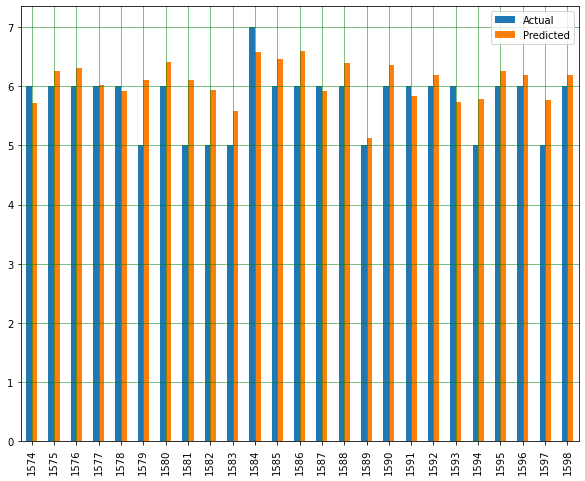

In [9]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

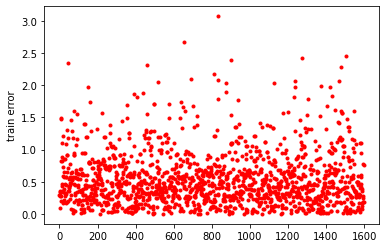

In [10]:
plt.plot(train_error,'r.')
plt.ylabel('train error')
plt.show()

In [11]:
estimator.fit(X_train, Y_train)
prediction = estimator.predict(X_test)

test_error =  np.abs(Y_test - prediction)
mean_error = np.mean(test_error)
min_error = np.min(test_error)
max_error = np.max(test_error)
std_error = np.std(test_error)
print('\nTesting results:\nmean=',mean_error,'\nmin=',min_error,'\nmax=',max_error,'\nstd=',std_error)

Epoch 1/300
256/256 [==============================] - 1s 1ms/step - loss: 12.0152
Epoch 2/300
256/256 [==============================] - 0s 1ms/step - loss: 0.9745
Epoch 3/300
256/256 [==============================] - 0s 1ms/step - loss: 0.6109
Epoch 4/300
256/256 [==============================] - 0s 1ms/step - loss: 0.5771
Epoch 5/300
256/256 [==============================] - 0s 1ms/step - loss: 0.5578
Epoch 6/300
256/256 [==============================] - 0s 1ms/step - loss: 0.5437
Epoch 7/300
256/256 [==============================] - 0s 1ms/step - loss: 0.5408
Epoch 8/300
256/256 [==============================] - 0s 1ms/step - loss: 0.5225
Epoch 9/300
256/256 [==============================] - 0s 1ms/step - loss: 0.5156
Epoch 10/300
256/256 [==============================] - 0s 2ms/step - loss: 0.5047
Epoch 11/300
256/256 [==============================] - 0s 1ms/step - loss: 0.5067
Epoch 12/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4973
Epoch 13/300

256/256 [==============================] - 0s 1ms/step - loss: 0.4477
Epoch 99/300
256/256 [==============================] - 0s 981us/step - loss: 0.4471
Epoch 100/300
256/256 [==============================] - 0s 993us/step - loss: 0.4514
Epoch 101/300
256/256 [==============================] - 0s 962us/step - loss: 0.4485
Epoch 102/300
256/256 [==============================] - 0s 939us/step - loss: 0.4508
Epoch 103/300
256/256 [==============================] - 0s 982us/step - loss: 0.4492
Epoch 104/300
256/256 [==============================] - 0s 935us/step - loss: 0.4491
Epoch 105/300
256/256 [==============================] - 0s 929us/step - loss: 0.4564
Epoch 106/300
256/256 [==============================] - 0s 942us/step - loss: 0.4417
Epoch 107/300
256/256 [==============================] - 0s 953us/step - loss: 0.4648
Epoch 108/300
256/256 [==============================] - 0s 933us/step - loss: 0.4527
Epoch 109/300
256/256 [==============================] - 0s 1ms/step - 

256/256 [==============================] - 0s 1ms/step - loss: 0.4418
Epoch 195/300
256/256 [==============================] - 0s 986us/step - loss: 0.4447
Epoch 196/300
256/256 [==============================] - 0s 974us/step - loss: 0.4411
Epoch 197/300
256/256 [==============================] - 0s 919us/step - loss: 0.4438
Epoch 198/300
256/256 [==============================] - 0s 927us/step - loss: 0.4371
Epoch 199/300
256/256 [==============================] - 0s 982us/step - loss: 0.4422
Epoch 200/300
256/256 [==============================] - 0s 939us/step - loss: 0.4420
Epoch 201/300
256/256 [==============================] - 0s 919us/step - loss: 0.4433
Epoch 202/300
256/256 [==============================] - 0s 919us/step - loss: 0.4440
Epoch 203/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4454
Epoch 204/300
256/256 [==============================] - 0s 2ms/step - loss: 0.4443
Epoch 205/300
256/256 [==============================] - 0s 2ms/step - los

256/256 [==============================] - 0s 971us/step - loss: 0.4429
Epoch 292/300
256/256 [==============================] - 0s 974us/step - loss: 0.4355
Epoch 293/300
256/256 [==============================] - 0s 939us/step - loss: 0.4410
Epoch 294/300
256/256 [==============================] - 0s 921us/step - loss: 0.4355
Epoch 295/300
256/256 [==============================] - 0s 923us/step - loss: 0.4474
Epoch 296/300
256/256 [==============================] - 0s 990us/step - loss: 0.4429
Epoch 297/300
256/256 [==============================] - 0s 982us/step - loss: 0.4335
Epoch 298/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4407
Epoch 299/300
256/256 [==============================] - 0s 1ms/step - loss: 0.4334
Epoch 300/300
64/64 [==============================] - 0s 792us/step

Testing results:
mean= 0.47662286907434465 
min= 0.0038881301879882812 
max= 2.14107608795166 
std= 0.398245834308728


In [12]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': prediction})
df1 = df.tail(25)
print(df1)

     Actual  Predicted
295     6.0   5.772929
296     6.0   5.513820
297     5.0   5.202481
298     6.0   5.174705
299     5.0   5.265435
300     6.0   5.685829
301     5.0   5.138652
302     6.0   5.316610
303     6.0   5.686723
304     6.0   6.168024
305     6.0   6.212202
306     5.0   5.347352
307     5.0   5.083155
308     6.0   5.559142
309     5.0   5.327208
310     5.0   5.829441
311     6.0   6.128783
312     5.0   5.429241
313     5.0   5.385576
314     5.0   5.076232
315     6.0   6.499564
316     4.0   6.114368
317     5.0   6.232932
318     4.0   5.171073
319     6.0   6.420449


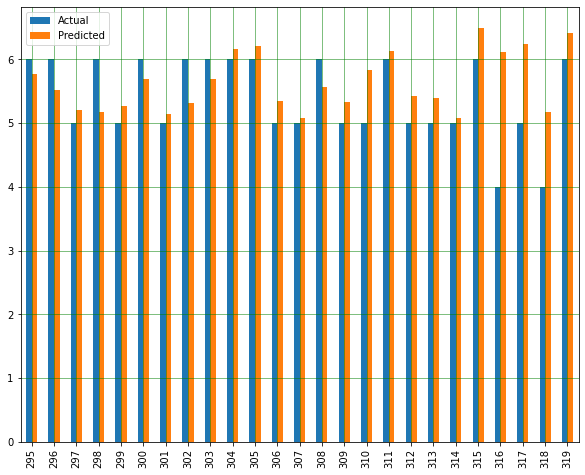

In [13]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

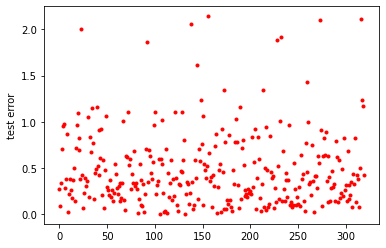

In [14]:
plt.plot(test_error,'r.')
plt.ylabel('test error')
plt.show()